In [93]:
import os
import torchvision.transforms as T
import torchvision.transforms.functional as TF
import torchvision
import json
import numpy as np
import pickle 
import torch


from PIL import Image
from torch.utils.data import Dataset

In [94]:
data = pickle.load(open("preds.pkl", "rb"))

In [12]:
config = {}
config['test_classes'] = ["bicycle", "girl", "table", "crocodile", "maple_tree", "wolf", "raccoon", "dolphin", "train", "crab", "boy", "pear", "leopard", "cup", "lizard"]

In [13]:
class cifarZSClassification(Dataset):
    def __init__(self, data_dir, train_transforms, transforms, train):
        self.train = train
        if self.train == True:
            self.transform = T.Compose(train_transforms + transforms)
            torch_data = torchvision.datasets.CIFAR100(
                root=data_dir, train=True, download=True, transform=self.transform)    
        else:
            self.transform = T.Compose(transforms)
            torch_data = torchvision.datasets.CIFAR100(
                root=data_dir, train=False, download=True, transform=self.transform)

        test_classes = [torch_data.classes.index(c) for c in config["test_classes"]]

        if train == True:
            self.target_classes = np.delete(np.arange(100), test_classes)
        else:
            self.target_classes = np.array(test_classes)

        self.indices = [i for i in range(len(torch_data.targets)) if torch_data.targets[i] in self.target_classes]

        self.data = torch_data.data[self.indices]
        self.targets = list(np.array(torch_data.targets)[self.indices])

    def __getitem__(self, index):
        img, target = self.data[index], self.targets[index]

        img = Image.fromarray(img)

        if self.transform is not None:
            img = self.transform(img)

        return img, target

    def __len__(self):
        return len(self.data)

In [14]:
transforms = [
    T.ToTensor(),
    T.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
]

In [15]:
train_data = cifarZSClassification("./", [], [], train=True)
test_data = cifarZSClassification("./", [], [], train=False)

Files already downloaded and verified
Files already downloaded and verified


In [16]:
train_data[0]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F8CBFE0B190>, 19)

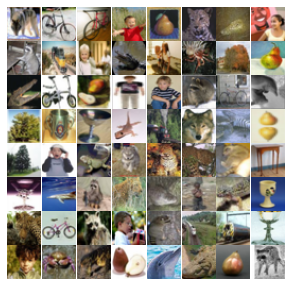

In [62]:
import matplotlib.pyplot as plt
num_row = 8
fig, ax = plt.subplots(num_row, num_row)
fig.set_size_inches(5, 5)
for i in range(num_row):
    for j in range(num_row):
        ax[i][j].imshow(test_data[(i*num_row)+j][0])
        ax[i][j].axis('off')
        ax[i][j].set_xticklabels([])
        ax[i][j].set_yticklabels([])
    
plt.subplots_adjust(wspace=0, hspace=0)
# plt.imshow(train_data[0][0])
# plt.axis('off')

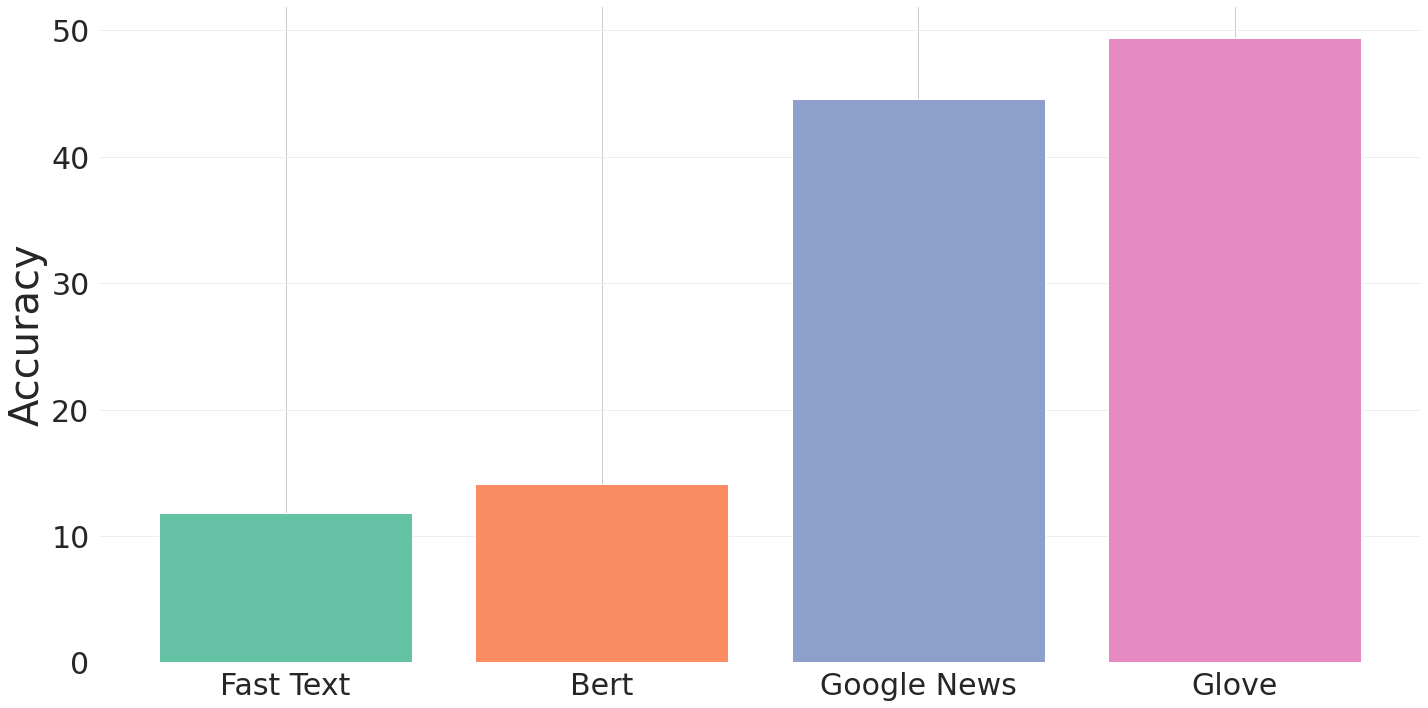

In [58]:
x = ['Fast Text', 'Bert', 'Google News', 'Glove']
y = [11.8, 14.1, 44.6, 49.4]

colors = sns.color_palette('Set2')
fig, ax1 = plt.subplots(1,1, figsize=(20, 10))

# ax1.bar(confirms, vals, color=['sandybrown', 'lightcoral', 'thistle'])
ax1.bar(x, y, color=colors[:4]) 

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.yaxis.grid(True, color='#EEEEEE')
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

ax1.xaxis.set_tick_params(labelsize=30)
ax1.yaxis.set_tick_params(labelsize=30)

ax1.set_ylabel('Accuracy', fontsize=40)  # x label
# ax1.legend(loc=2, prop={'size': 20})

plt.tight_layout()
# fig.suptitle('throughput and message losses for different delays (10-Queue 10-Producer 10-Consumer)')
plt.show()

In [98]:
inputs, targets, preds = data['o_inputs'], data['targets'], data['preds']

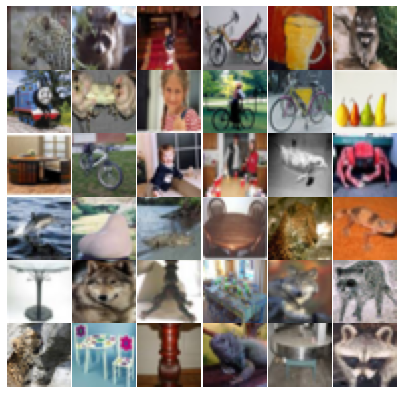

In [121]:
plot_data = inputs[np.where(np.not_equal(preds, targets))[0]]

import matplotlib.pyplot as plt
n_row = 6
n_col = 6
fig, ax = plt.subplots(n_row, n_col)
fig.set_size_inches(7, 7)
for i in range(n_row):
    for j in range(n_col):
        ax[i][j].imshow(plot_data[(i*n_col)+j].reshape(32, 32, 3))
        
        ax[i][j].axis('off')
        ax[i][j].set_xticklabels([])
        ax[i][j].set_yticklabels([])
    
plt.subplots_adjust(wspace=0, hspace=0)

In [83]:
inputs[0].shape

(3, 32, 32)